<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/tf/cats_vs_dogs_image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats vs Dogs Image Augmentation

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2020-10-31 04:41:41--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   132MB/s    in 0.5s    

2020-10-31 04:41:42 (132 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
local_zip = 'cats_and_dogs_filtered.zip'

In [7]:
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [17]:
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [20]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 8s - loss: 0.6917 - accuracy: 0.5235 - val_loss: 0.6783 - val_accuracy: 0.5310
Epoch 2/100
100/100 - 8s - loss: 0.6666 - accuracy: 0.5960 - val_loss: 0.6836 - val_accuracy: 0.5160
Epoch 3/100
100/100 - 8s - loss: 0.6240 - accuracy: 0.6575 - val_loss: 0.6160 - val_accuracy: 0.6740
Epoch 4/100
100/100 - 8s - loss: 0.5840 - accuracy: 0.7065 - val_loss: 0.5743 - val_accuracy: 0.7070
Epoch 5/100
100/100 - 8s - loss: 0.5463 - accuracy: 0.7245 - val_loss: 0.5730 - val_accuracy: 0.7130
Epoch 6/100
100/100 - 8s - loss: 0.5187 - accuracy: 0.7445 - val_loss: 0.6023 - val_accuracy: 0.6890
Epoch 7/100
100/100 - 8s - loss: 0.4894 - accuracy: 0.7560 - val_loss: 0.5528 - val_accuracy: 0.7140
Epoch 8/100
100/100 - 8s - loss: 0.4618 - accuracy: 0.7850 - val_loss: 0.5399 - val_accuracy: 0.7280
Epoch 9/100
100/100 - 8s - loss: 0.4389 - accuracy: 0.7935 - val_loss: 0.5587 - val_accuracy: 0.7210
Epoch 1

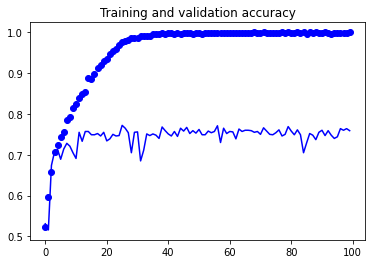

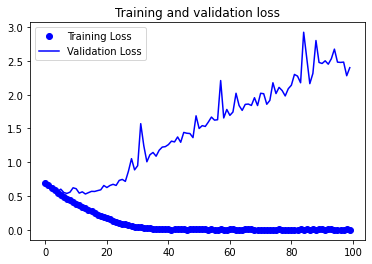

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


The training accuracy is close to 100% and the validation accuracy is in the 70ish range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting --and one simple method is to augment the images a bit.

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


These are just a few of the options available.

- rotation_range: is a value in degrees (0-100)

In [29]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 16s - loss: 0.6952 - accuracy: 0.5055 - val_loss: 0.6880 - val_accuracy: 0.5000
Epoch 2/100
100/100 - 16s - loss: 0.6859 - accuracy: 0.5420 - val_loss: 0.6609 - val_accuracy: 0.6480
Epoch 3/100
100/100 - 16s - loss: 0.6627 - accuracy: 0.6100 - val_loss: 0.6226 - val_accuracy: 0.6690
Epoch 4/100
100/100 - 16s - loss: 0.6391 - accuracy: 0.6435 - val_loss: 0.6526 - val_accuracy: 0.5930
Epoch 5/100
100/100 - 16s - loss: 0.6276 - accuracy: 0.6480 - val_loss: 0.5705 - val_accuracy: 0.7130
Epoch 6/100
100/100 - 16s - loss: 0.6148 - accuracy: 0.6655 - val_loss: 0.5634 - val_accuracy: 0.7090
Epoch 7/100
100/100 - 16s - loss: 0.5990 - accuracy: 0.6725 - val_loss: 0.5250 - val_accuracy: 0.7500
Epoch 8/100
100/100 - 16s - loss: 0.5933 - accuracy: 0.6815 - val_loss: 0.5807 - val_accuracy: 0.6750
Epoch 9/100
100/100 - 16s - loss: 0.5836 - accuracy: 0.6980 - val_loss: 0.5581 - val_accuracy: 0.7100
Epoch 10/100
100/100 - 16s - loss: 0.5717 - accuracy: 0.6975 - val_loss: 0.5194 - 

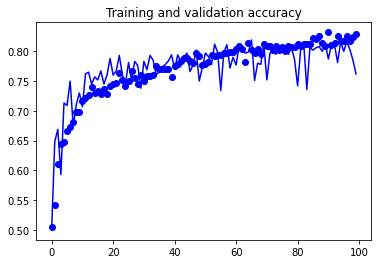

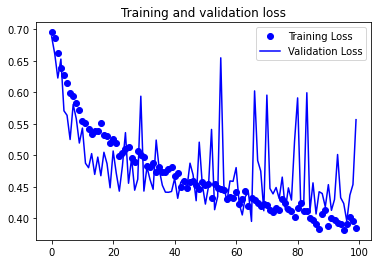

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()